In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### 1. Plotting of the two spherical Gaussian

In [2]:
mean1 = [1, 1]
cov1 = [[1, 0],[0, 1]]

mean2 = [0, 4]
cov2 = [[4, 0],[0, 4]]

In [3]:
rng = np.random.RandomState(123)

In [4]:
x1, y1 = rng.multivariate_normal(mean1, cov1, 100).T
x2, y2 = rng.multivariate_normal(mean2, cov2, 50 ).T

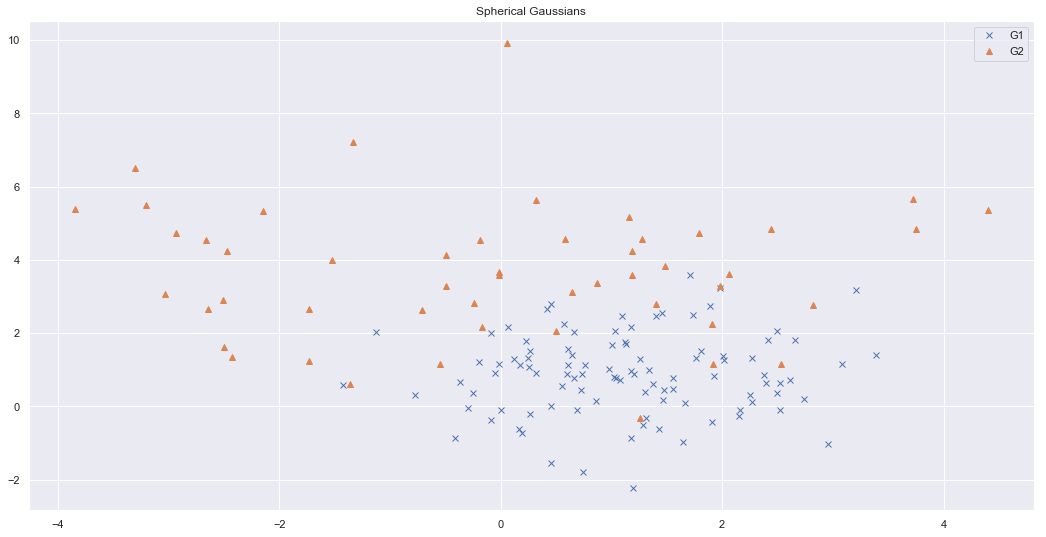

In [5]:
plt.figure(figsize=(18,9))
plt.plot(x1, y1, 'x')
plt.plot(x2, y2, '^')
plt.title('Spherical Gaussians')
plt.legend(['G1', 'G2'])

#### 2. Implementation of K-means algorithm

In [6]:
x = np.concatenate([x1, x2])
y = np.concatenate([y1, y2])

In [7]:
points = np.stack([x, y],axis=1)

In [8]:
print (points.shape)

(150, 2)


In [9]:
k = 2

In [10]:
def dist(a, b, ax = 0):
    """
    Measures the distance between vectors a and b.
    Input(s):
    - a, b: vectors
    - ax: set ax = 1 when computing with multiple vectors.
    """
    return np.linalg.norm(a - b, axis = ax)

Initialize the clusters by picking two random points as the initial cluster centers.

In [11]:
def initialize_centroids(points, k):
    return points[rng.randint(0,150, size=(k,))]

In [12]:
C = initialize_centroids(points, k)
print (C)

[[0.64517554 1.39158424]
 [0.49993988 2.0513843 ]]


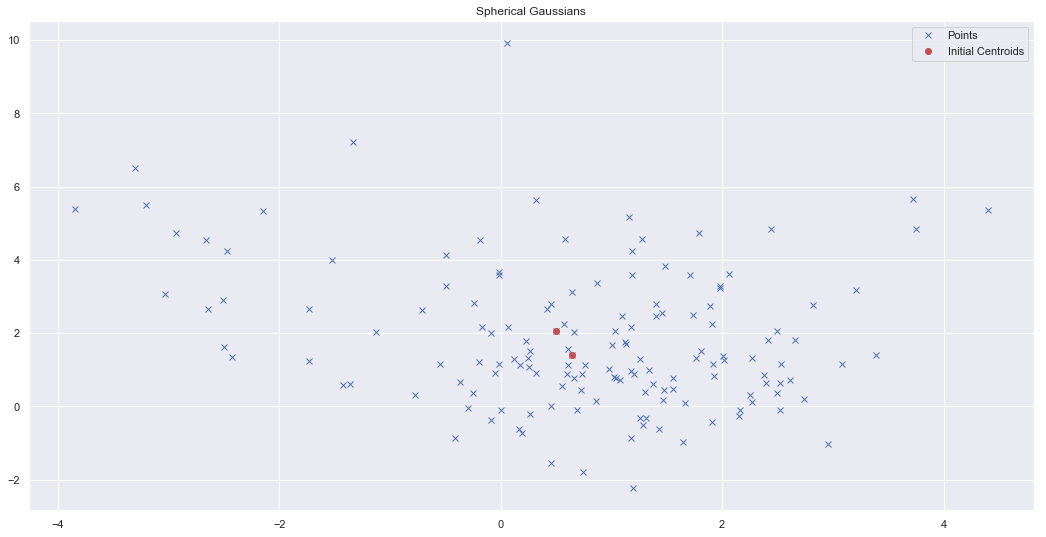

In [13]:
plt.figure(figsize=(18,9))
plt.plot(x, y, 'x')
c1, c2 = C.T
plt.plot(c1, c2, 'o',color='r')
plt.title('Spherical Gaussians')
plt.legend(['Points', 'Initial Centroids'])

In [14]:
def dist2centroid(points, C):
    """
    Computes the distance from each point to the centroids.
    Returns the distances and the closest cluster.
    Input(s):
    - points: points to compute the distance from the centroids
    - C: rows of points with each row denoting each centroid
    """
    distance = np.zeros((points.shape[0], C.shape[0]))
    cluster = np.zeros((points.shape[0],))
    for i in range(points.shape[0]):
        d = dist(points[i], C, ax=1)
        cluster[i] = np.argmin(d)
        distance[i] = d
    loss = 0
    for i in range(points.shape[0]):
        loss += distance[i,cluster[i].astype(int)] ** 2    
    return distance, cluster, loss

In [15]:
def new_centroids(points, cluster, C):
    """
    Computes the new centroids with the new cluster labels.
    Iput(s):
    - points: coordinates of the points
    - cluster: the labels of the points
    - C: centroids of the clusters
    """
    for i in range(C.shape[0]):
        p = [points[j] for j in range(points.shape[0]) if cluster[j] == i]
        C[i] = np.mean(p, axis = 0)
    return C    

We terminate the iterations when there is no longer changes in the centroids.

In [16]:
def foo(points, C):
    """
    - points: coordinates of the points
    - C: centroids of the clusters
    """
    C_old = np.zeros(C.shape)
    error = dist(C, C_old, None)
    n = 0
    while error != 0:
        n += 1
        distance, cluster, loss = dist2centroid(points, C)
        C_old = C.copy()
        C = new_centroids(points, cluster, C)
        error = dist(C, C_old, None)
        print ('Iteration: {} | Loss: {}'.format(n,loss))
        print (C)
    return C, cluster

In [17]:
C, cluster = foo(points, C)

Iteration: 1 | Loss: 768.2413102877598
[[1.13786955 0.53724218]
 [0.17617629 3.56979781]]
Iteration: 2 | Loss: 528.4674333706112
[[1.09976828 0.62697443]
 [0.13711066 3.74260895]]
Iteration: 3 | Loss: 524.4358894221618
[[1.11804684 0.68368038]
 [0.05113446 3.81488917]]
Iteration: 4 | Loss: 522.8890263196286
[[ 1.10678544  0.74890005]
 [-0.01169572  3.93494653]]
Iteration: 5 | Loss: 520.1251718624596
[[ 1.134647    0.80865307]
 [-0.14414645  4.00736308]]
Iteration: 6 | Loss: 518.2236454657395
[[ 1.12435391  0.821799  ]
 [-0.14867499  4.04717904]]
Iteration: 7 | Loss: 518.0933185825609
[[ 1.11199774  0.83463316]
 [-0.14813344  4.08890778]]
Iteration: 8 | Loss: 517.8772114971483
[[ 1.11477719  0.8532101 ]
 [-0.18346875  4.11811501]]
Iteration: 9 | Loss: 517.7473392366127
[[ 1.11477719  0.8532101 ]
 [-0.18346875  4.11811501]]


In [18]:
def std_cluster(points, cluster, C):
    """
    Computes the standard deviation of the clusters.
    Input(s):
    - points: coordinates of the points
    - cluster: the labels of the points
    - C: centroids of the clusters
    """
    var = np.zeros((C.shape[0],))
    for i in range(C.shape[0]):
        p = [(dist(points[j], C[i]) ** 2) for j in range(points.shape[0]) if cluster[j] == i]
        var[i] = np.mean(p, axis = 0)
    return np.sqrt(var)    

In [19]:
sd = std_cluster(points, cluster, C)

In [20]:
print ('Standard deviation for cluster 1: {}'.format(sd[0]))
print ('Standard deviation for cluster 2: {}'.format(sd[1]))

Standard deviation for cluster 1: 1.4712589967502516
Standard deviation for cluster 2: 2.55973816785857


In [21]:
c0 = [points[j] for j in range(points.shape[0]) if cluster[j] == 0]        
c1 = [points[j] for j in range(points.shape[0]) if cluster[j] == 1]        
c0 = np.array(c0)
c1 = np.array(c1)

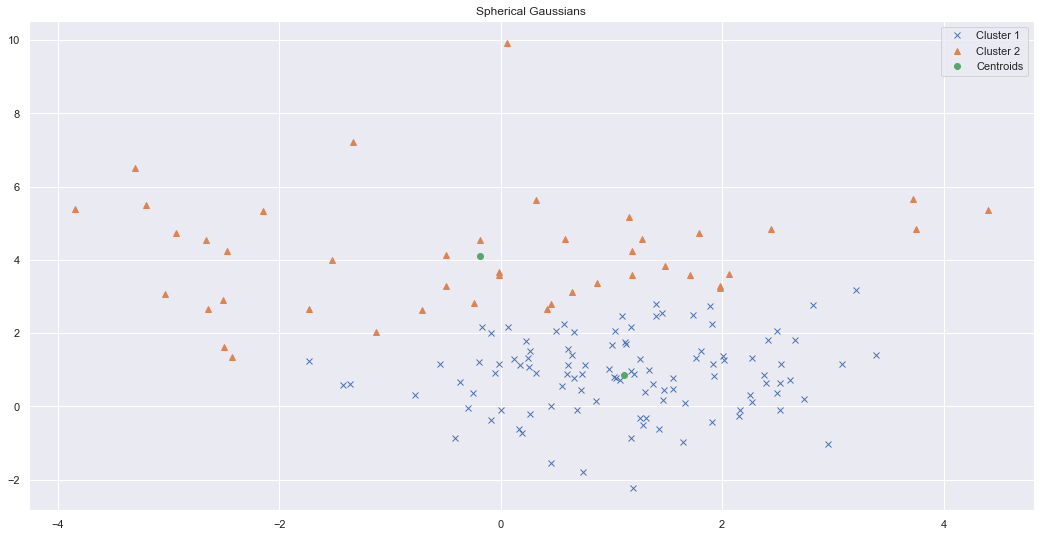

In [22]:
plt.figure(figsize=(18,9))
a0, b0 = c0.T
a1, b1 = c1.T
plt.plot(a0, b0, 'x')
plt.plot(a1, b1, '^')
m1, m2 = C.T
plt.plot(m1, m2, 'o',color='g')
plt.title('Spherical Gaussians')
plt.legend(['Cluster 1', 'Cluster 2', 'Centroids'])

#### 3. Using the soft EM algorithm

In [23]:
p = np.ones((k,))/k
d = 2

In [24]:
squared_sum = [(dist(points[j], np.mean(points, axis=0)) ** 2) for j in range(points.shape[0]) ]
sd = np.sqrt(np.mean(squared_sum))
print (sd)

2.4516606460909567


In [25]:
C = initialize_centroids(points, k)
print (C)

[[ 0.19463348 -0.72766949]
 [ 0.72421399  0.44789193]]


In [26]:
def prob_spherical_gauss(mean, sd, x, d = 2):
    """
    Returns the probability of the spherical gaussian given label y.
    Input(s):
    - mean: mean of the cluster of the label
    - sd: sample variance, same for every label
    - x: the sample whose probability is of interest
    """
    return ((2 * np.pi * (sd ** 2)) ** (-d/2)) * np.exp(-0.5 * (1/sd ** 2) * (np.linalg.norm(mean - x) ** 2))

Expectation step: Computation of soft labels

In [29]:
def compute_soft_labels(p, C, sd, x):
    """
    Compute the soft labels for each point. Returns a probability
    vector with k dimensions where k is the number of clusters.
    Input(s):
    - p: prior distribution of the points
    - centroids: current centroids of the clusters
    - sd: sample variance, same for every label
    - x: the sample whose probability is of interest
    """
    prob = np.zeros((centroids.shape[0]))
    for i in range(centroids.shape[0]):
        prob[i] = p[i] * prob_spherical_gauss(centroids[i], sd, x)
    return prob/np.sum(prob)

In [31]:
C.shape[0]

2

In [35]:
i = j
prob = compute_soft_labels(p, C, sd, points[i])
print (prob, np.sum(prob))

[0.34092393 0.65907607] 1.0


Maximization step: Computation of new prior, new weighted mean and new weighted variance

In [47]:
def new_prior(p, C, sd, points):
    """
    
    """
    array = np.zeros((points.shape[0],k))
    for i in range(points.shape[0]):
        array[i] = compute_soft_labels(p, C, sd, points[i])
#     return array        
    return np.sum(array, axis = 0)/points.shape[0]    

In [74]:
def weighted_mean(p, C, sd, points):
    """
    
    """
    array = np.zeros((points.shape[0],k))
    for i in range(points.shape[0]):
        array[i] = compute_soft_labels(p, C, sd, points[i])
    w0 = [array[j,0] * points[j] for j in range(points.shape[0])]
    w1 = [array[j,1] * points[j] for j in range(points.shape[0])]
    wm0 = np.sum(w0, axis = 0)/np.sum(array[:,0])
    wm1 = np.sum(w1, axis = 0)/np.sum(array[:,1])
    return wm0, wm1

In [ ]:
def weighted_var(p, C, sd, points):
    """
    
    """
    array = np.zeros((points.shape[0],k))
    for i in range(points.shape[0]):
        array[i] = compute_soft_labels(p, C, sd, points[i])
    
